**Прохоров Михаил, 4 курс, 3 группа**

**Лабораторная работа №1. Моделирование БСВ.**

1) Смоделировать 1000 реализаций БСВ с помощью мультипликативного конгруэнтного метода (МКМ) с параметрами 𝛼0 = 𝛼01, 𝛽 = 𝑚𝑎𝑥{𝑐1, 𝑀 − 𝑐1}, 𝑀 = $2^{31}$ и вывести последний элемент полученной последовательности.
2) Смоделировать 1000 реализаций БСВ с помощью метода Макларена-Марсальи, используя в качестве простейших датчиков БСВ датчики: 𝐷1 – датчик из первого задания, 𝐷2 – датчик по методу МКМ с параметрами 𝛼0 = 𝛼02, 𝛽 = 𝑚𝑎𝑥{𝑐2, 𝑀 – 𝑐2}, 𝑀 = $2^{31}$, 𝐾 – объём вспомогательной таблицы. Вывести последний элемент полученной последовательности.
3) Визуализировать полученные выборки: построить диаграмму рассеяния и гистограмму (число столбцов = 10). Какие выводы можно сделать на основе построенных графиков?
4) Выполнить два пункта на выбор. Проверить точность моделирования с помощью

    • теста «совпадения моментов» с уровнем значимости ε = 0.05

    • теста «равномерность двумерного распределения» (количество ячеек в разбиении выберите самостоятельно) с уровнем значимости ε = 0.05

    • теста «ковариация» с уровнем значимости ε = 0.05 (в качестве параметра t выбрать значение 30. Вывести все такие значения  лага, при котором тест не проходит)

    **• критерия согласия Колмогорова с уровнем значимости ε = 0.05**

    **• $χ^2$-критерия Пирсона с уровнем значимости ε = 0.05**

|Вариант|$\alpha_{01}$|$с_1$|$\alpha_{02}$|$с_2$|$K$|
|---|---|---|---|---|---|
|11|261463909|474379977|234289925|3097871|192|

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import scipy

from collections import Counter
from scipy import optimize
from scipy.stats import chi2

%matplotlib inline

In [2]:
alpha_01 = 261463909
c_1 = 474379977
alpha_02 = 234289925
c_2 = 3097871
K = 192

In [3]:
n = 1000

## 1. Мультипликативный конгруэнтный метод

In [4]:
def get_values(n, generator):
    values = []
    for i in range(n):
        values.append(next(generator))
    return values

In [5]:
def mcm(alpha_t, beta, M):
    while True:
        alpha_t = (alpha_t * beta) % M
        yield alpha_t / M

In [6]:
mcm_gen = mcm(alpha_t=alpha_01, beta=max(c_1, pow(2, 31) - c_1), M=pow(2, 31))
values_mcm = get_values(n, mcm_gen)
values_mcm[-1]

0.7789994054473937

## 2. Метод Макларена-Марсальи

In [7]:
def maclaren_marsaglia(mcm_gen1, mcm_gen2):
    values = get_values(K, mcm_gen1)
    value = 0
    while True:
        s = math.floor(next(mcm_gen2) * K)
        value = values[s]
        values[s] = next(mcm_gen1)
        yield value

In [8]:
mcm_gen1 = mcm(alpha_t=alpha_01, beta=max(c_1, pow(2, 31) - c_1), M=pow(2, 31))
mcm_gen2 = mcm(alpha_t=alpha_02, beta=max(c_2, pow(2, 31) - c_2), M=pow(2, 31))
values_mm = get_values(n, maclaren_marsaglia(mcm_gen1, mcm_gen2))
values_mm[-1]

0.20965212723240256

## 3. Визуализация

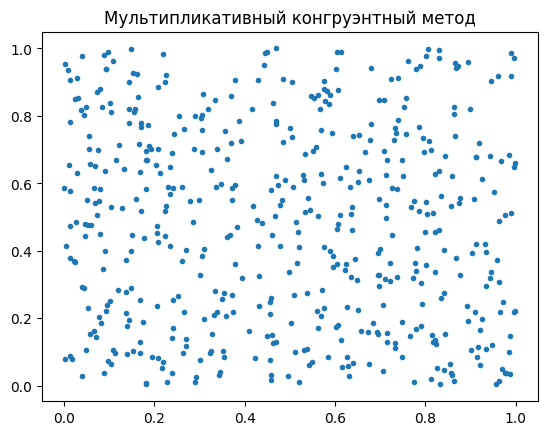

In [9]:
x = values_mcm[::2]
y = values_mcm[1::2]
plt.plot(x, y, '.')
plt.title('Мультипликативный конгруэнтный метод')
plt.show()

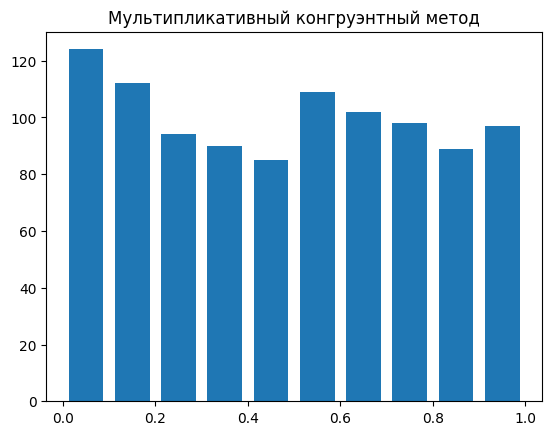

In [10]:
plt.hist(values_mcm, rwidth=0.75)
plt.title('Мультипликативный конгруэнтный метод')
plt.show()

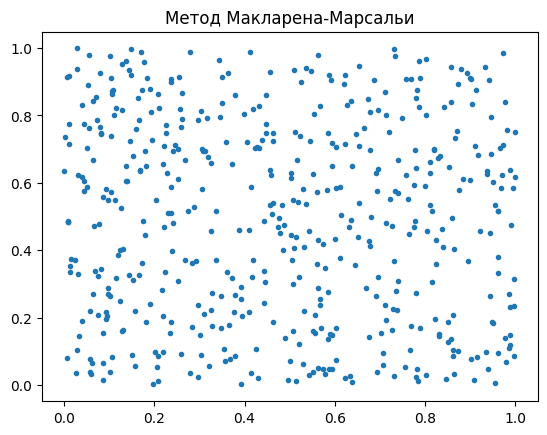

In [11]:
x = values_mm[::2]
y = values_mm[1::2]
plt.plot(x, y, '.')
plt.title('Метод Макларена-Марсальи')
plt.show()

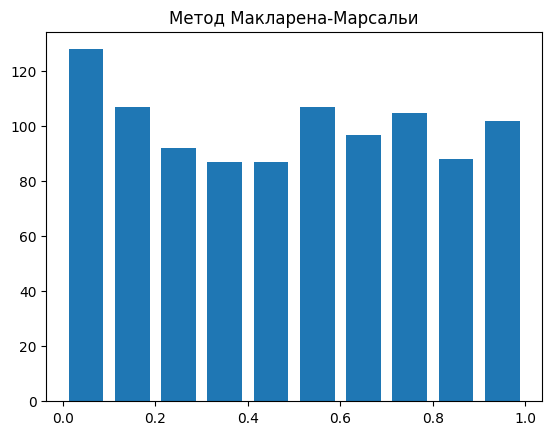

In [12]:
plt.hist(values_mm, rwidth=0.75)
plt.title('Метод Макларена-Марсальи')
plt.show()

## 4.1. Критерий согласия Пирсона с уровнем значимости ε = 0.05

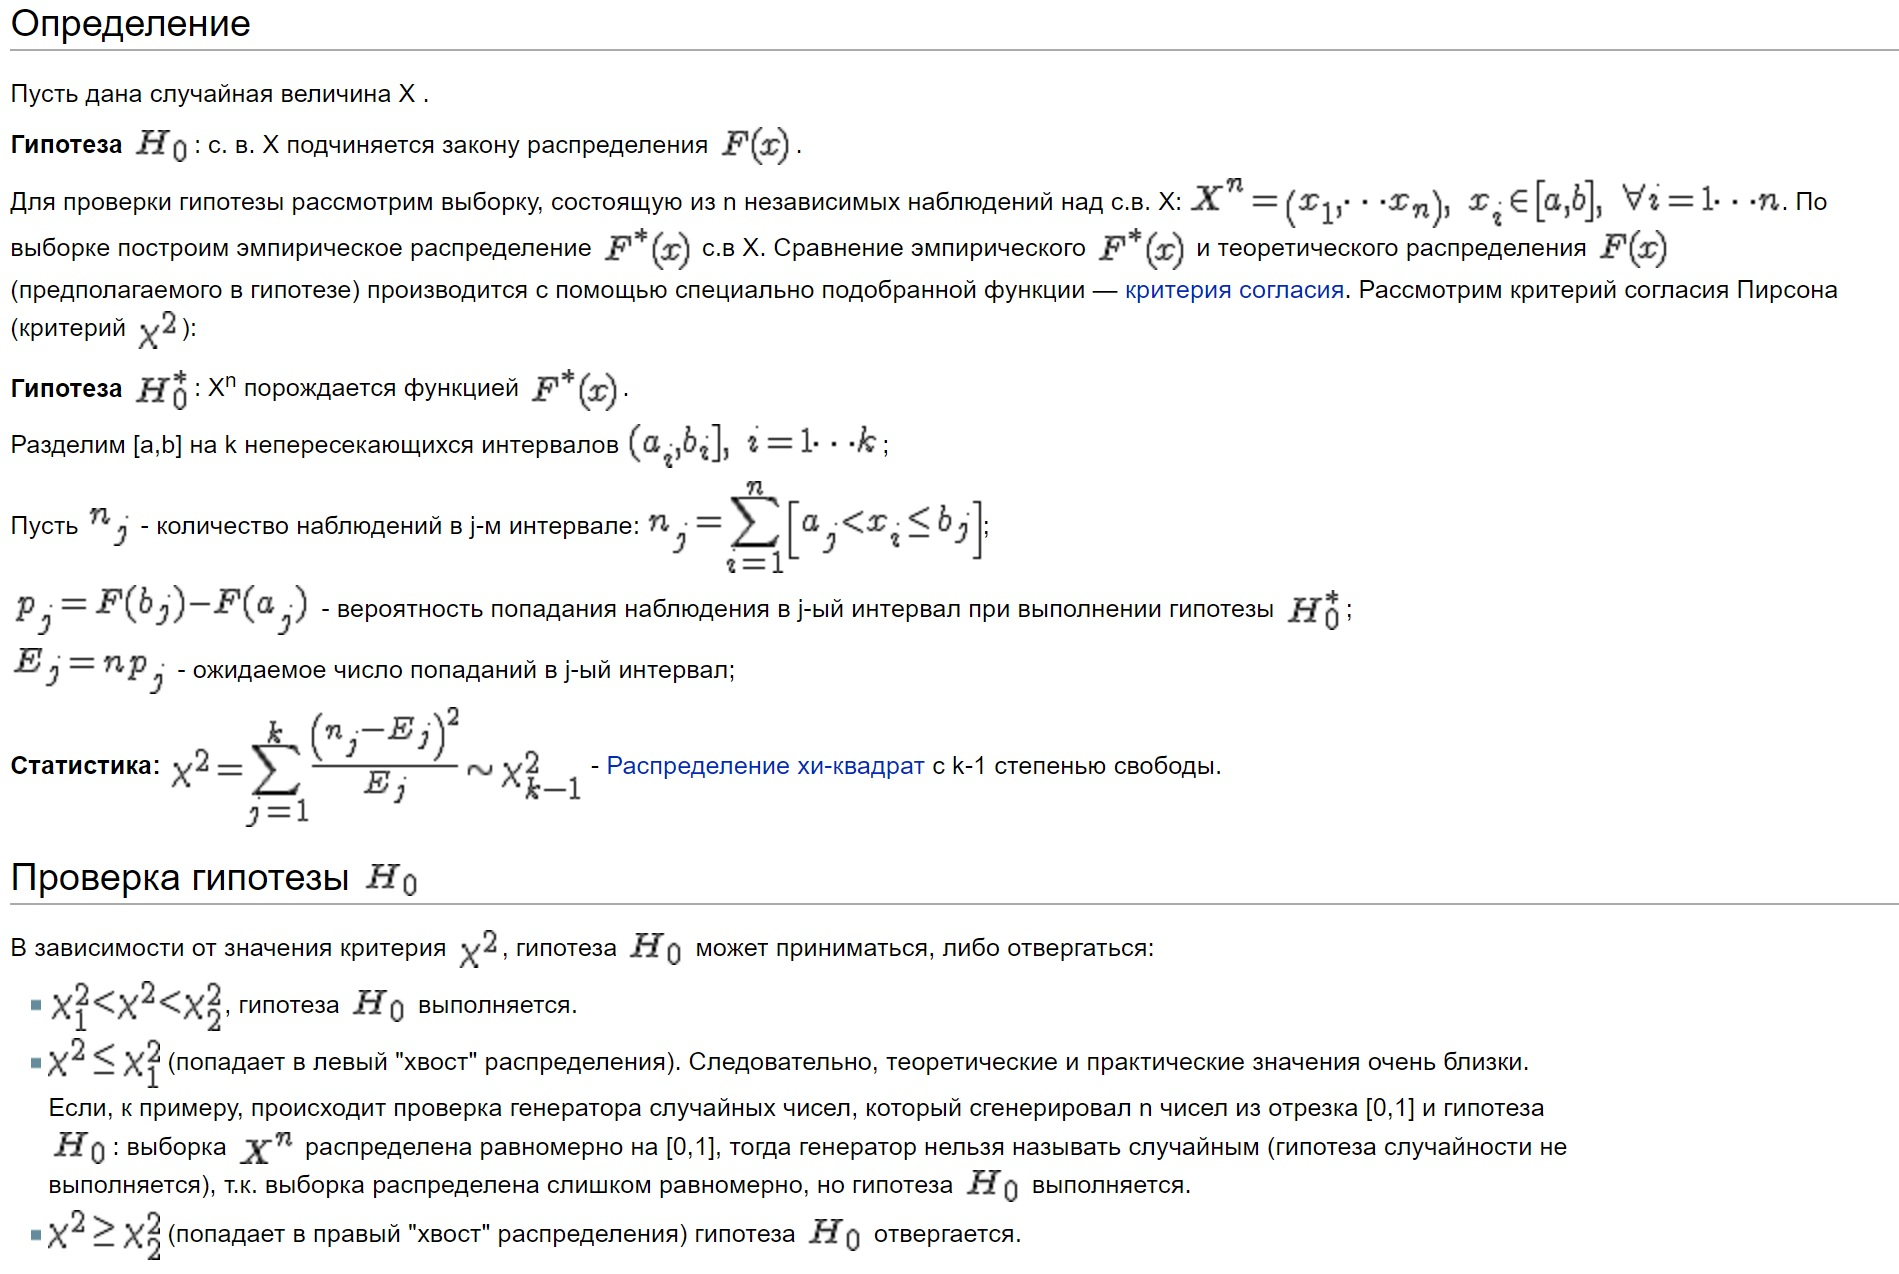

In [13]:
def frec(values, n):
    f_obs = [0] * n
    i = 0
    values_sorted = sorted(values)
    for val in values_sorted:
        if val < (i + 1) / n and val >= i / n:
            f_obs[i] += 1
        else:
            i += 1
            f_obs[i] += 1
    return f_obs

In [14]:
def chi_square(values, n):
    f_exp = len(values) / n 
    f_obs = frec(values, n)
    chisquare = 0.0
    for i in range(0, n):
        chisquare += (f_obs[i] - f_exp) ** 2 / f_exp
    return chisquare

In [15]:
k = 11
eps = 0.05
precision = 6

print(f'Табличное значение для df={k - 1} и eps={eps}:', round(chi2.ppf(1 - eps, k - 1), precision))
print('Мультипликативный конгруэнтный метод:', round(chi_square(values_mcm, k), precision))
print('Метод Макларена-Марсальи:', round(chi_square(values_mm, k), precision))

Табличное значение для df=10 и eps=0.05: 18.307038
Мультипликативный конгруэнтный метод: 18.27
Метод Макларена-Марсальи: 16.312


In [16]:
k = 41
eps = 0.05
precision = 6

print(f'Табличное значение для df={k - 1} и eps={eps}:', round(chi2.ppf(1 - eps, k - 1), precision))
print('Мультипликативный конгруэнтный метод:', round(chi_square(values_mcm, k), precision))
print('Метод Макларена-Марсальи:', round(chi_square(values_mm, k), precision))

Табличное значение для df=40 и eps=0.05: 55.758479
Мультипликативный конгруэнтный метод: 43.45
Метод Макларена-Марсальи: 34.676


## 4.2. Критерий согласия Колмогорова с уровнем значимости ε = 0.05

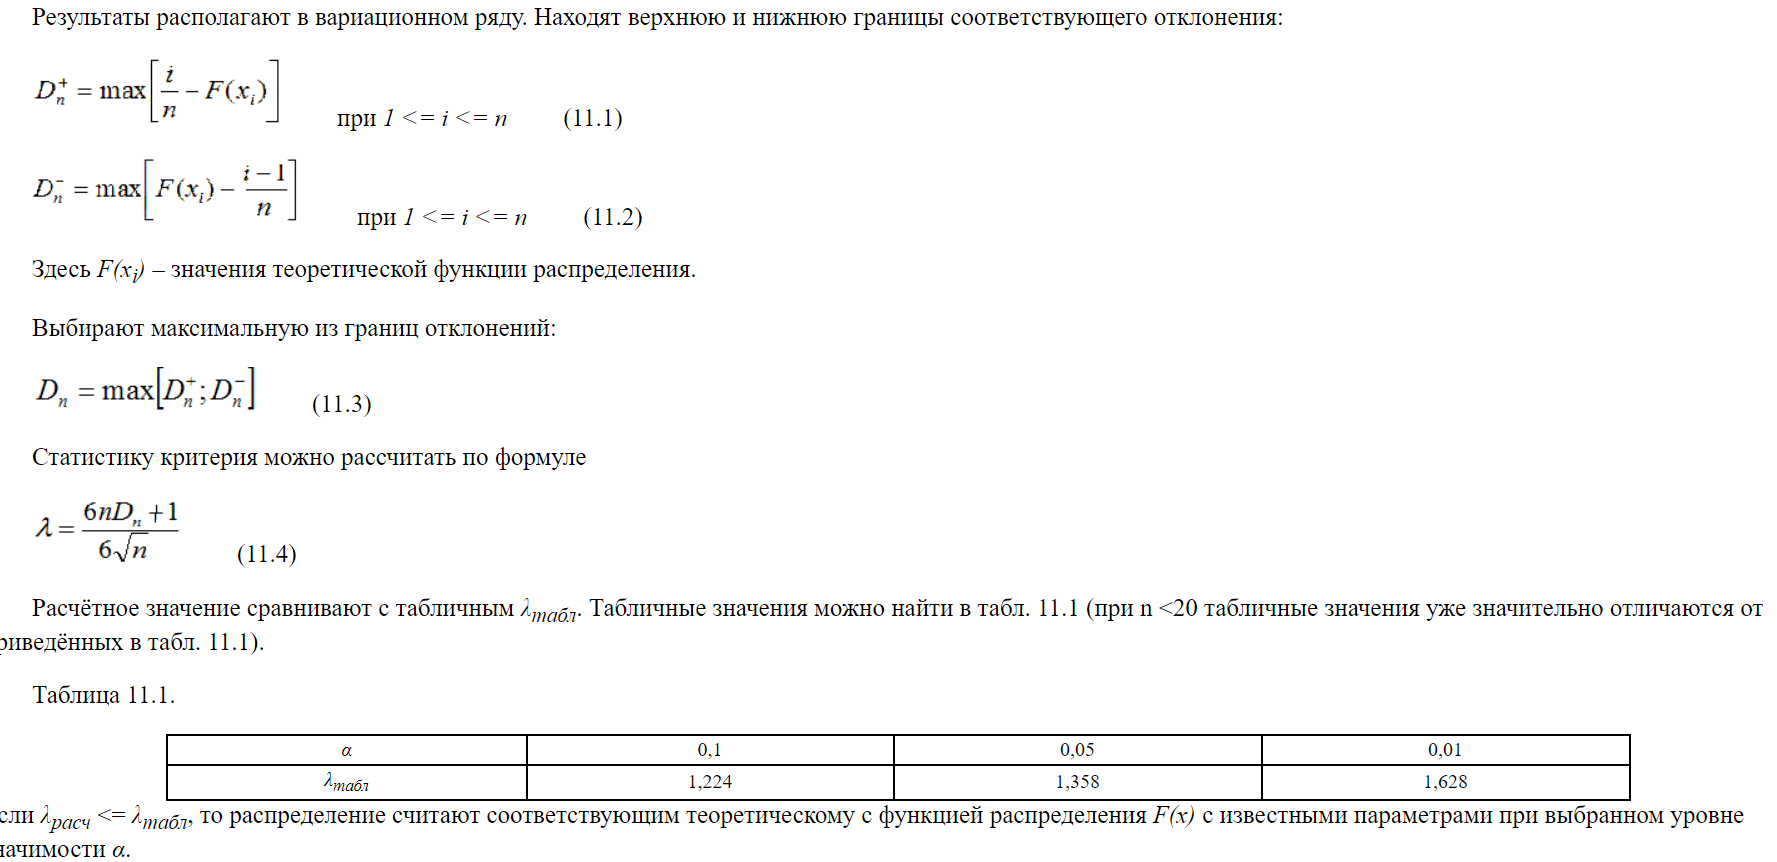

In [17]:
def kolmogorov(values):
    values_sorted = sorted(values)
    sup_d = 0
    for i in range(1, len(values_sorted)):
        f1 = i 
        f2 = i + 1
        f3 = values_sorted[i] * len(values_sorted)
        d = max(abs(f1 - f3), abs(f2 - f3))
        if d > sup_d:
            sup_d = d
    return sup_d / len(values_sorted)

In [18]:
def lambda_observed(sup_d, n):
    return (6 * n * sup_d) / (6 * math.sqrt(n))

In [19]:
precision = 6

print('Табличное значение для eps=0.05: 1.358')
print('Мультипликативный конгруэнтный метод:', round(lambda_observed(kolmogorov(values_mcm), n), precision))
print('Метод Макларена-Марсальи:', round(lambda_observed(kolmogorov(values_mm), n), precision))

Табличное значение для eps=0.05: 1.358
Мультипликативный конгруэнтный метод: 1.488539
Метод Макларена-Марсальи: 1.330425
